In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed5c4a5d13114591e5ee76b3bbaf9589


In [6]:
# Create a set of random latitude and longitude combinations. zip packs the data in pairs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list. This command is unpacking the zip array into a tuple list, 
# you can only do this once as it then removes it from memory
coordinates = list(lat_lngs)

## 6.1.5

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

## 6.2.6

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. city.replace(" ","+") takes out the spaces and concatonates the name together
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | nantucket
Processing Record 3 of Set 1 | tabou
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | henties bay
Processing Record 6 of Set 1 | macheng
Processing Record 7 of Set 1 | high level
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | deputatskiy
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | tandalti
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | gimli
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | malpe
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | kieta
Processing Record 22 of Set 1 | isla mujeres
Processing Record 23 of Set 1 | kapaa
Process

Processing Record 40 of Set 4 | excelsior springs
Processing Record 41 of Set 4 | kortkeros
Processing Record 42 of Set 4 | canutama
Processing Record 43 of Set 4 | mayo
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | campbell river
Processing Record 46 of Set 4 | tocopilla
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | pospelikha
Processing Record 49 of Set 4 | la union
Processing Record 50 of Set 4 | kuala pilah
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | rocha
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | kleive
Processing Record 6 of Set 5 | manavalakurichi
Processing Record 7 of Set 5 | aykhal
Processing Record 8 of Set 5 | sijunjung
Processing Record 9 of Set 5 | karasjok
Processing Record 10 of Set 5 | churapcha
Processing Record 11 of Set 5 | port elizabeth
Processing Record 12 of Set 5 | helong
Processing Record 13 of Set 5 | makin

Processing Record 33 of Set 8 | padang
Processing Record 34 of Set 8 | taldan
Processing Record 35 of Set 8 | nyagan
Processing Record 36 of Set 8 | oktyabrskoye
Processing Record 37 of Set 8 | irupi
Processing Record 38 of Set 8 | strezhevoy
Processing Record 39 of Set 8 | adrar
Processing Record 40 of Set 8 | quirinopolis
Processing Record 41 of Set 8 | faanui
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | tiksi
Processing Record 44 of Set 8 | leua
Processing Record 45 of Set 8 | aflu
City not found. Skipping...
Processing Record 46 of Set 8 | esperance
Processing Record 47 of Set 8 | honningsvag
Processing Record 48 of Set 8 | northam
Processing Record 49 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 8 | goderich
Processing Record 1 of Set 9 | ereymentau
Processing Record 2 of Set 9 | zarubino
Processing Record 3 of Set 9 | la reforma
Processing Record 4 of Set 9 | lumeje
Processing Record 5 of Set 9 | nakamura
Processing 

Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | pangody
Processing Record 23 of Set 12 | kuito
Processing Record 24 of Set 12 | luoyang
Processing Record 25 of Set 12 | adzope
Processing Record 26 of Set 12 | murray bridge
Processing Record 27 of Set 12 | kirakira
Processing Record 28 of Set 12 | kudahuvadhoo
Processing Record 29 of Set 12 | moree
Processing Record 30 of Set 12 | salalah
Processing Record 31 of Set 12 | araouane
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | mahon
Processing Record 34 of Set 12 | lieksa
Processing Record 35 of Set 12 | yaan
Processing Record 36 of Set 12 | yumen
Processing Record 37 of Set 12 | prudentopolis
Processing Record 38 of Set 12 | laukaa
Processing Record 39 of Set 12 | diu
Processing Record 40 of Set 12 | fengcheng
Processing Record 41 of Set 12 | durazno
Processing Record 42 of Set 12 | erdenet
Processing Record 43 of Set 12 | arrifes
Processing Record 44 of Set 12 | roma
Processing Record 45 

In [11]:
len(city_data)

589

## 6.2.7

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.0531,-135.3300,39.09,87,100,17.27,US,2022-04-03 19:40:37
1,Nantucket,41.2835,-70.0995,48.31,75,100,10.36,US,2022-04-03 19:39:33
2,Tabou,4.4230,-7.3528,80.47,82,100,10.38,CI,2022-04-03 19:37:47
3,Sao Filipe,14.8961,-24.4956,71.13,76,4,9.53,CV,2022-04-03 19:40:37
4,Henties Bay,-22.1160,14.2845,61.66,83,0,4.92,NA,2022-04-03 19:39:56
5,Macheng,31.1783,115.0319,54.81,67,100,2.51,CN,2022-04-03 19:40:37
6,High Level,58.5169,-117.1360,28.51,64,75,11.50,CA,2022-04-03 19:40:38
7,Mataura,-46.1927,168.8643,46.13,95,98,2.01,NZ,2022-04-03 19:40:38
8,Deputatskiy,69.3000,139.9000,-19.62,99,79,2.44,RU,2022-04-03 19:40:38
9,Port Alfred,-33.5906,26.8910,68.18,91,98,3.00,ZA,2022-04-03 19:40:39


In [13]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-04-03 19:40:37,57.0531,-135.3300,39.09,87,100,17.27
1,Nantucket,US,2022-04-03 19:39:33,41.2835,-70.0995,48.31,75,100,10.36
2,Tabou,CI,2022-04-03 19:37:47,4.4230,-7.3528,80.47,82,100,10.38
3,Sao Filipe,CV,2022-04-03 19:40:37,14.8961,-24.4956,71.13,76,4,9.53
4,Henties Bay,NA,2022-04-03 19:39:56,-22.1160,14.2845,61.66,83,0,4.92
5,Macheng,CN,2022-04-03 19:40:37,31.1783,115.0319,54.81,67,100,2.51
6,High Level,CA,2022-04-03 19:40:38,58.5169,-117.1360,28.51,64,75,11.50
7,Mataura,NZ,2022-04-03 19:40:38,-46.1927,168.8643,46.13,95,98,2.01
8,Deputatskiy,RU,2022-04-03 19:40:38,69.3000,139.9000,-19.62,99,79,2.44
9,Port Alfred,ZA,2022-04-03 19:40:39,-33.5906,26.8910,68.18,91,98,3.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

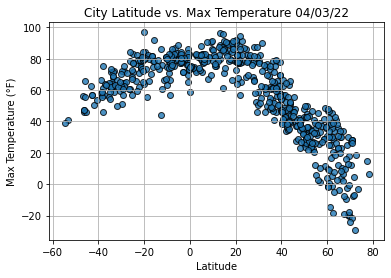

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

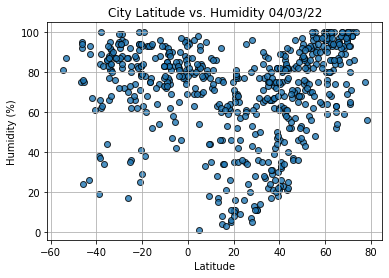

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

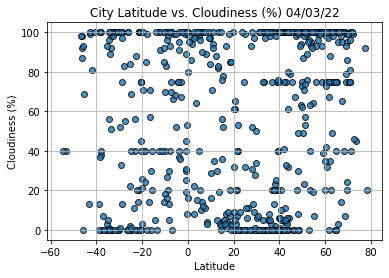

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

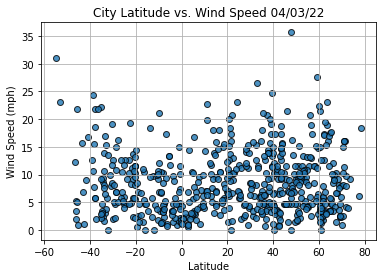

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()